<body>
	<h1>About the Dataset</h1>
<p>
The telecoms churn dataset contains information about customers of a telecom company and whether they churned (cancelled their service) or not. It includes various features such as customer demograhics (age, gender, etc) and service usage data (number of calls, minutes, billing method, etc).
</p>

<p>This dataset consists of 7043 examples and 21 features, and is commonly used in machine learning and data analysis as a benchmark for predicting customer churn. It can be used to develop models that can identify at-risk customers and take steps to prevent churn, potentially leading to increased customer retention and revenue for the company.</p>

<p>For more info, refer to the following resources:</p>
<ul>
<li><a href="https://www.kaggle.com/blastchar/telco-customer-churn">Kaggle</a></li>
<li><a href="https://archive.ics.uci.edu/ml/datasets/Telecom+Customer+Churn">UCL</a></li>
</ul>
</body>
</html>

**About Feature**

---
- **customerID**: Customer ID
- **gender**: Whether the customer is a male or a female
- **Senior Citizen**: Whether the customer is a senior citizen or not (1, 0)
- **Partner**: Whether the customer has a partner or not (Yes, No)
- **Dependents**: Whether the customer has dependents or not (Yes, No)
- **tenure**: Number of months the customer has stayed with the company
- **Phone Service**: Whether the customer has a phone service or not (Yes, No)
- **Multiple Lines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
- **Internet Service**: Customer’s internet service provider (DSL, Fiber optic, No)
- **Online Security**: Whether the customer has online security or not (Yes, No, No internet service)
- **Online Backup**: Whether the customer has online backup or not (Yes, No, No internet service)
- **Device Protection**: Whether the customer has device protection or not (Yes, No, No internet service)
- **Tech Support**: Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
- **Streaming**: Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
- **Paperless Billing**: Whether the customer has paperless billing or not (Yes, No)
- **Payment Method**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **Monthly Charges**: The amount charged to the customer monthly
- **Total Charges**: The total amount charged to the customer
- **Churn Label**: Whether the customer churned or not (Yes or No)


## Initial Plan for Data Exploration

**1. Data Overview:**
- Load the dataset and review its structure.
- Identify key columns, including customer demographics and churn status.

**2. Descriptive Analysis:**
- Obtain summary statistics for numeric columns
- Visualize the churn distribution and identify trends.

**3. Categorical Analysis:**
- Explore categorical variables
- Analyze their impact on churn rates.

**4. Churn Reasons:**
- Investigate reasons for churn.
- Understand the main drivers of customer attrition.

**5. Correlation Analysis**

**6. Hypothesis testing**
- Hypothesis(1): Phone Service Impact Churn
- Hypothesis(2): Contract Type Affects Churn
- Hypothesis(3): Seniority Affects Churn

**7. Suggestions for the next steps in analyzing the data**

**8. Summary of quality of data**

## **Importing necessary libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# tensorflow installation is needed (takes a few minutes)
# pip install tensorflow 

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
import seaborn as sns

C:\Users\shkim\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load the data

In [5]:
df = pd.read_csv("./data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1459,3070-BDOQC,Female,0,No,No,60,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,99.65,5941.05,No
4894,0533-UCAAU,Male,1,Yes,No,57,Yes,Yes,DSL,No,...,Yes,No,Yes,No,One year,Yes,Credit card (automatic),71.10,4140.1,No
3191,7636-OWBPG,Male,1,No,No,12,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),29.35,381.2,No
4669,8701-DGLVH,Male,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,1042.65,No
5594,0027-KWYKW,Female,0,Yes,Yes,23,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.75,1849.95,No


First of all, drop customerID column as it is of no use

In [6]:
df.drop('customerID',axis='columns',inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Descriptive Analysis

Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with this column

In [8]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

 it is string. Lets convert it to numbers

In [9]:
#uncomment this to check
#pd.to_numeric(df.TotalCharges)

In [10]:
df.TotalCharges.isnull().sum()

0

some values seems to be not numbers or NAN but blank string. Let's find out such rows

In [11]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [12]:
total_charge = df["TotalCharges"]
missing = total_charge[~total_charge.str.replace(".", "").str.isdigit()]
print("Number of missing total charge: ", len(missing))
missing.head()

Number of missing total charge:  11


C:\Users\shkim\AppData\Local\Temp\ipykernel_29656\2798757725.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  missing = total_charge[~total_charge.str.replace(".", "").str.isdigit()]


488      
753      
936      
1082     
1340     
Name: TotalCharges, dtype: object

In [13]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [15]:
df.shape

(7043, 20)

Out of 7043 rows, only 11 rows have TotalCharges as empty string, Remove rows with space in TotalCharges

In [16]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [17]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [18]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\shkim\AppData\Local\Temp\ipykernel_29656\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [19]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [20]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


# **Displaying summary statistics of the numeric columns**

In [21]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Data Visualization

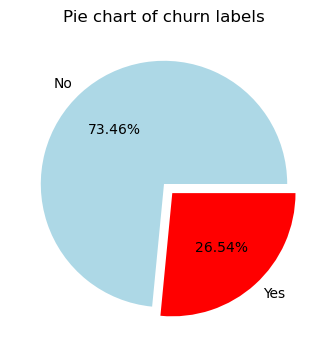

In [22]:
# Getting a sense of the percentage of churn labels
churn_label_count = df["Churn"].value_counts()
fig = plt.figure(figsize=(7, 4), dpi=100)
plt.pie(
    churn_label_count,
    autopct="%.2f%%",
    labels=churn_label_count.index,
    colors=["lightblue", "red"],
    explode=[0, 0.1],
)
plt.title("Pie chart of churn labels")
plt.show()

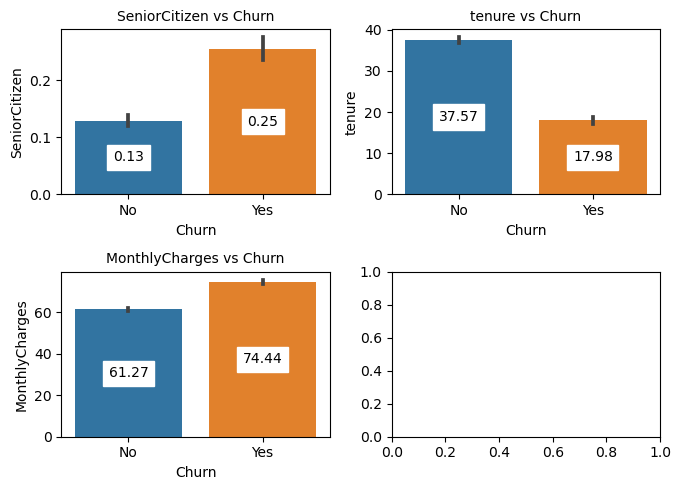

In [23]:
numeric_columns = df.select_dtypes(include=["int64", "float64"])

fig, axes = plt.subplots(2, 2, figsize=(7, 5))
axes = axes.flatten()
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    sns.barplot(data=df, x="Churn", y=column, ax=ax, estimator=np.mean)
    ax.set_title(f"{column} vs Churn", fontsize=10)

    for k in ax.containers:
        ax.bar_label(
            k, fontsize=10, label_type="center", backgroundcolor="w", fmt="%.2f"
        )
plt.tight_layout()
plt.show()

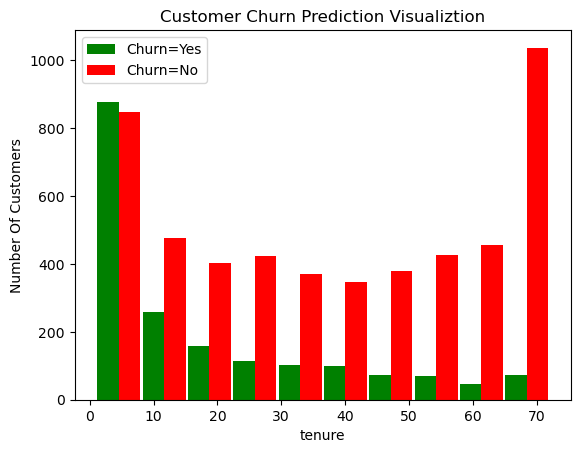

In [24]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend();

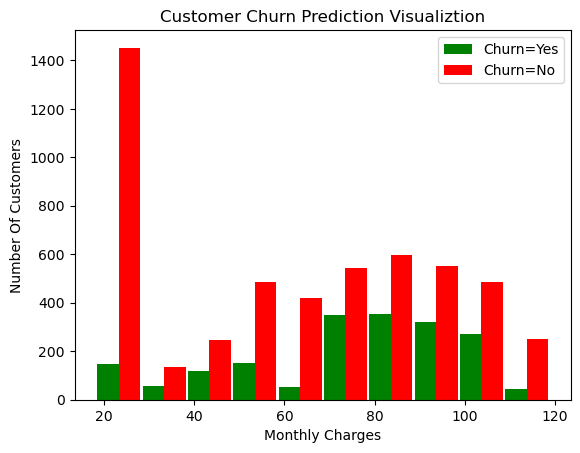

In [25]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend();

Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [26]:
df1.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [27]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [28]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [29]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\shkim\AppData\Local\Temp\ipykernel_29656\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\shkim\AppData\Local\Temp\ipykernel_29656\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [30]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Convert Yes and No to 1 or 0

In [31]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity',
                  'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                  'StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\shkim\AppData\Local\Temp\ipykernel_29656\1603448743.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [32]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


Change genders from male/female to 0/1

In [33]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\shkim\AppData\Local\Temp\ipykernel_29656\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [34]:
df1.gender.unique()

array([1, 0], dtype=int64)

### One hot encoding for categorical columns

In [35]:
print_unique_col_values(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [36]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [37]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3567,1,0,1,1,14,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1804,1,0,1,1,34,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
468,1,0,0,1,44,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1610,0,0,1,1,51,1,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
3829,0,1,1,0,43,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [38]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

## Correlation Analysis

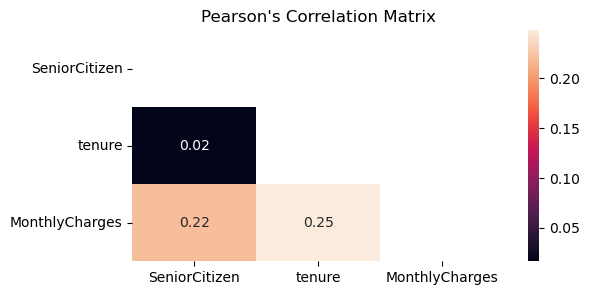

In [39]:
# corr = df.corr(numeric_only=True)
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6, 3))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", linecolor="c")
plt.title("Pearson's Correlation Matrix")
plt.show()

Monthly Charges has a positive correlation with Senior Citizen and tenure. Other than that, there is no strong correlation between each other attributes.

## Scaling

In [40]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [41]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
555,1,0,1,1,0.774648,1,1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4597,1,0,0,0,0.070423,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2548,0,1,0,0,0.098592,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
781,1,0,1,1,0.056338,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
6022,1,0,0,0,0.267606,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [42]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [43]:
t_f_cols = ['InternetService_DSL', 'InternetService_Fiber optic',
'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
'PaymentMethod_Credit card (automatic)',
'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

In [44]:
df2[t_f_cols] = df2[t_f_cols].astype(int)

In [45]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [46]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

### Train test split

In [47]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [48]:
X_train.shape

(5625, 26)

In [49]:
X_test.shape

(1407, 26)

In [50]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2964,0,0,1,0,0.323944,1,1,1,0,0,...,1,0,0,0,1,0,0,0,1,0
5113,1,0,1,1,0.985915,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
5363,0,0,1,1,0.971831,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5074,1,0,0,1,0.676056,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
156,1,0,0,0,0.295775,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2390,1,0,1,1,0.098592,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5878,0,0,0,0,0.028169,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
942,0,0,0,0,0.323944,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2809,0,1,0,0,0.507042,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0
6498,1,0,0,0,0.000000,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0


# Build models

In [66]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [59]:
# Initialize and train the Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_lr.predict(X_test)
# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred)
roc_auc_lr = roc_auc_score(y_test, y_pred)
lr_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_lr}")
print(f"ROC-AUC: {roc_auc_lr}")
print("Classification Report:")
print(lr_rep)

Accuracy: 0.8038379530916845
ROC-AUC: 0.7177146482447484
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1038
           1       0.65      0.54      0.59       369

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



In [52]:
# Initialize and train the XGBoost model
model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8024164889836531
ROC-AUC: 0.7115113492175386
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1038
           1       0.66      0.52      0.58       369

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [62]:
# Initialize and train the Support Vector Machine model
model_s = SVC()
model_s.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_s.predict(X_test)
# Evaluate the model
accuracy_s = accuracy_score(y_test, y_pred)
roc_auc_s = roc_auc_score(y_test, y_pred)
svc_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_s}")
print(f"ROC-AUC: {roc_auc_s}")
print("Classification Report:")
print(svc_rep)

Accuracy: 0.8045486851457001
ROC-AUC: 0.708589846014067
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1038
           1       0.67      0.51      0.58       369

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.80      1407



In [64]:
# Initialize and train the K-Nearest Neighbors model
model_k = KNeighborsClassifier()
model_k.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_k.predict(X_test)
# Evaluate the model
accuracy_k = accuracy_score(y_test, y_pred)
roc_auc_k = roc_auc_score(y_test, y_pred)
knn_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_s}")
print(f"ROC-AUC: {roc_auc_s}")
print("Classification Report:")
print(knn_rep)

Accuracy: 0.8045486851457001
ROC-AUC: 0.708589846014067
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1038
           1       0.55      0.52      0.54       369

    accuracy                           0.76      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.76      0.76      0.76      1407



C:\Users\shkim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [65]:
# Initialize and train the Decision Tree model
model_d = DecisionTreeClassifier()
model_d.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_d.predict(X_test)
# Evaluate the model
accuracy_d = accuracy_score(y_test, y_pred)
roc_auc_d = roc_auc_score(y_test, y_pred)
dt_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_d}")
print(f"ROC-AUC: {roc_auc_d}")
print("Classification Report:")
print(dt_rep)

Accuracy: 0.7270788912579957
ROC-AUC: 0.6630715729122607
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1038
           1       0.48      0.53      0.50       369

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.74      0.73      0.73      1407



In [68]:
# Initialize and train the Random Forest model
model_r = RandomForestClassifier()
model_r.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_r.predict(X_test)
# Evaluate the model
accuracy_r = accuracy_score(y_test, y_pred)
roc_auc_r = roc_auc_score(y_test, y_pred)
rf_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_r}")
print(f"ROC-AUC: {roc_auc_r}")
print("Classification Report:")
print(rf_rep)

Accuracy: 0.7889125799573561
ROC-AUC: 0.6910059996553723
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1038
           1       0.63      0.49      0.55       369

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



# Recommendation for a final model.
Based on these classification reports, we recommend the Logistic Regression (LR) as the final model that best fits your needs regarding F1 score and explainability. The LR consistently achieves competitive F1 scores and offers insights into feature importance, making it a robust and interpretable choice for predicting customer churn.

## Summary Key Findings and Insights

In this notebook, we conducted a comprehensive analysis to build a classifier model for predicting customer churn. The dataset contained information about customers and whether they had churned (labeled 'Yes' or 'No'). Our goal was to create a model with a balance of accuracy, F1-score, and model explainability.

**1. Data Preprocessing:**
   - We started by exploring the dataset and checking for missing values and data types.
   - Categorical features were converted into numerical representations using one-hot encoding.
   - We conducted exploratory data analysis to identify any notable trends or patterns.

**2. Model Selection and Evaluation:**
   - We experimented with various classifier models, including Logistic Regression, eXtreme Gradien Boosting (XGBoot) Classifier, Support Vector Classifier (SVC), K-Nearest Neighbors (KNN), Decision Tree Classifier, Random Forest Classifier (RFC).
   - The primary evaluation metric we focused on was the F1-score, as it balances precision and recall for imbalanced datasets.

**3. Model Performance:**
   - The Logistic Regression (LR) consistently demonstrated strong performance in terms of F1-score, recall, and precision across 'Yes' and 'No' classes.
   - The LR achieved an F1-score around 0.59 and 0.8 accuracy for predicting customer churn, with competitive precision and recall.
   - The KGBoost Classifier, and SVC also showed strong performance with a higher recall but slightly lower precision.

**4. Model Explainability:**
   - LR provides insights into feature importance, which makes it an interpretable choice. It helps to identify the key drivers of customer churn.
   - Other ensemble methods like eXtreme Gradient Boosting also offer insights into feature importance.

**5. Recommendation:**
   - Based on the F1-score and model explainability, we recommend the **Logistic Regression Classifier (LR)** as the final model for predicting customer churn. It offers a balance of accuracy, precision, recall, and interpretability.
   - The key drivers of customer churn can be explored through the feature importances provided by the RFC.

In conclusion, the Logistic Regression Classifier is a robust choice for predicting customer churn, providing a practical balance between predictive power and explainability. The insights from the model can guide decision-makers in taking steps to retain valuable customers and reduce churn.
